# Tenglo Channel Experimento
# CTD Visualization

Guto Schettini, revised 17.Jun.2025

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
# ctd = [ctd_rdx_hdr, ctd_rdx]
with open('ctd_rdx.pkl', 'rb') as io:
    x = pickle.load(io)
    
hdr = x[0]
ctd = x[1]


# distances... from Sinc_CTD_ADCP.ipynb
with open('ctd_distances.pkl', 'rb') as io:
    distances = pickle.load(io)

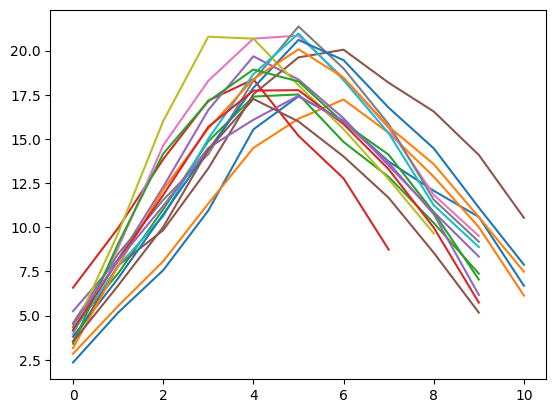

In [3]:
for h in hdr:
    h = np.array(h)
    
    plt.plot(h[:,3])

In [4]:
len(distances[0])

11

### Creating the matrixs for the section... and the distance_z

In [5]:
s_mtx = []
s_dist_z = []
mega_mtx = np.zeros((1, 10))

for i,s in enumerate(ctd):
    
    mtx = np.zeros((0, 9))
    dist_z = np.array([])
    for j,p in enumerate(s):
        #  0     1     2   3   4   5   6    7   8
        # set profile date z temp sal chlo turb ox
        select = np.hstack((p[:,:6], p[:,11:14]))
        
        mtx = np.vstack((mtx, select))
        
        get_x = distances[i][j]
        x_z = np.linspace(get_x, get_x, len(select))
        dist_z = np.concatenate((dist_z, x_z))
        
    # from the 'CTD_redux.ipynb'
    # # insert the cast number after the set number (columns)
    # down_cast = np.insert(down_cast, [1], i_cast, axis=1)
    a = np.array(mtx)
    b = np.atleast_2d(dist_z).T
    mtx_com_x = np.insert(a, [3], b, axis=1) # para Ivan
    print(a.shape, b.shape, mtx_com_x.shape)
    name = 'CTD_section_' + str(i+1) + '.txt'
    np.savetxt(name, mtx_com_x, fmt="%s")
    mega_mtx = np.vstack((mega_mtx, mtx_com_x))
        
    s_mtx.append(mtx)
    s_dist_z.append(dist_z)
    
mega_mtx = mega_mtx[1:, :]

(875, 9) (875, 1) (875, 10)
(865, 9) (865, 1) (865, 10)
(854, 9) (854, 1) (854, 10)
(782, 9) (782, 1) (782, 10)
(956, 9) (956, 1) (956, 10)
(1111, 9) (1111, 1) (1111, 10)
(1100, 9) (1100, 1) (1100, 10)
(1328, 9) (1328, 1) (1328, 10)
(1260, 9) (1260, 1) (1260, 10)
(962, 9) (962, 1) (962, 10)
(1041, 9) (1041, 1) (1041, 10)
(1011, 9) (1011, 1) (1011, 10)
(939, 9) (939, 1) (939, 10)
(819, 9) (819, 1) (819, 10)
(831, 9) (831, 1) (831, 10)
(766, 9) (766, 1) (766, 10)


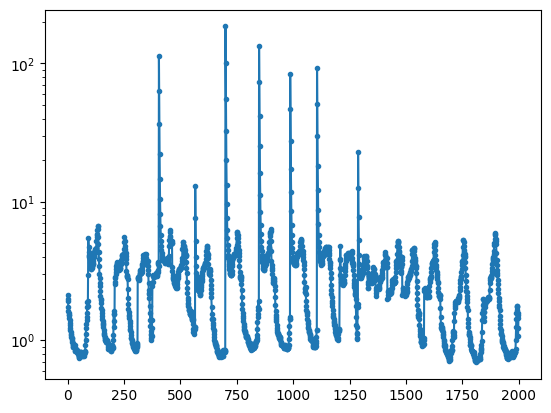

In [6]:
plt.plot(mega_mtx[3000:5000,7], '.-')
plt.yscale('log')

In [7]:
for i, s in enumerate(s_mtx):
    print(s.shape, s_dist_z[i].shape)

(875, 9) (875,)
(865, 9) (865,)
(854, 9) (854,)
(782, 9) (782,)
(956, 9) (956,)
(1111, 9) (1111,)
(1100, 9) (1100,)
(1328, 9) (1328,)
(1260, 9) (1260,)
(962, 9) (962,)
(1041, 9) (1041,)
(1011, 9) (1011,)
(939, 9) (939,)
(819, 9) (819,)
(831, 9) (831,)
(766, 9) (766,)


2023-12-12 08:19:21 2023-12-12 08:32:49


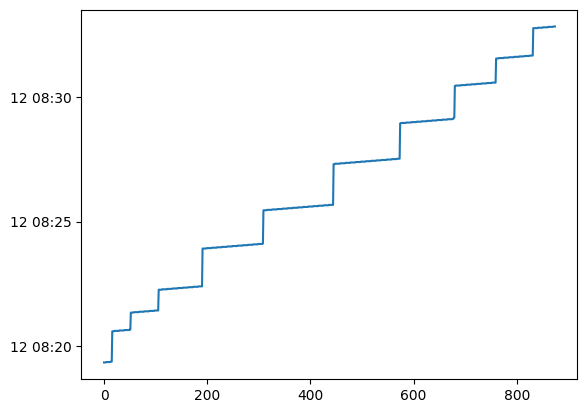

In [8]:
plt.plot(s_mtx[0][:,2])
print(s_mtx[0][0,2], s_mtx[0][-1,2])

In [9]:
def make_mask(h, dist):
    h = np.array(h)

    # hx = h[:,1]
    hx = dist
    hz = h[:,3]

    # maxz = np.max(hz) + 1
    maxz = 25

    cx = np.array([hx[-1], hx[0], hx[0]])
    cz = np.array([maxz, maxz, hz[0]])

    mask_x = np.concatenate((hx, cx))
    mask_y = np.concatenate((hz, cz))
    
    return mask_x, mask_y
    

In [10]:
def interp_vars(data, dist):
    
    # x = data[:,1]
    x = dist
    z = data[:,3]

    points = np.vstack((x, z)).T

    xi = np.linspace(np.min(x), np.max(x), 20)
    zi = np.linspace(np.min(z), np.max(z), 50)

    xx, zz = np.meshgrid(xi, zi)

    i_var = []
    for var in range(4, 9):
        interp = griddata(points, data[:, var], (xx, zz), method='linear')
        i_var.append(interp)
        
    return xi, zi, i_var

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gutos\AppData\Local\Temp\ipykernel_17068\2198479086.py:11: SyntaxWarning: invalid escape sequence '\m'
  variables = ['(a) Temperature ($^oC$)', '(b) Salinity (g/kg) ', '(c) Chlorophyll ($\mu g/L$)', '(d) Turbidity (FTU)', '(e) Dissolved Oxygen (%)']


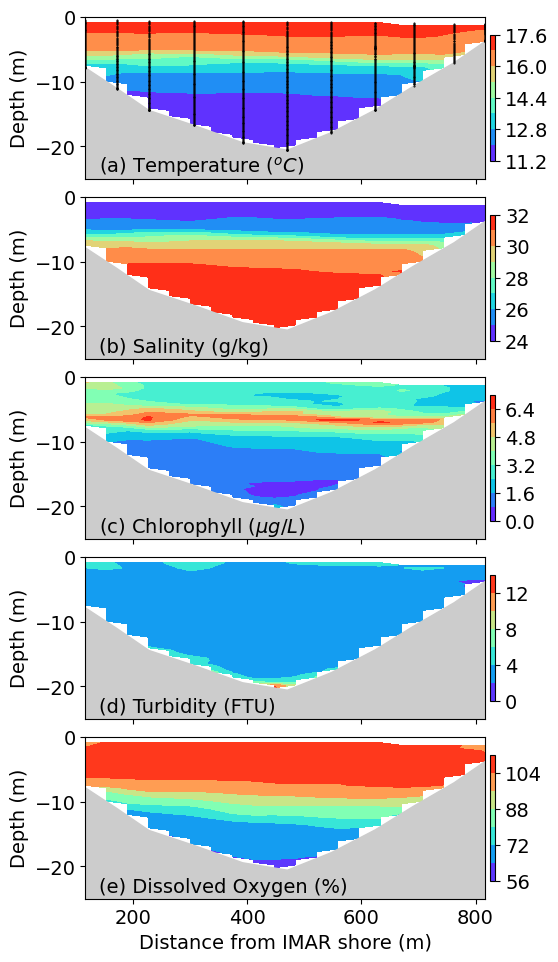

In [13]:
n = 10
data = s_mtx[n]
h = hdr[n]
dist_z = s_dist_z[n]
dist = distances[n]

mask_x, mask_z = make_mask(h, dist)
xi, zi, i_var = interp_vars(data, dist_z)

plt.rcParams.update({'font.size':14})
variables = ['(a) Temperature ($^oC$)', '(b) Salinity (g/kg) ', '(c) Chlorophyll ($\mu g/L$)', '(d) Turbidity (FTU)', '(e) Dissolved Oxygen (%)']

fig = plt.figure(figsize=(5,9))

# axis positions
px = .1
py = .8
dx = .8
dy = .18
dint = .02

# colorbar positions
pxcb = px + dx + 0.01
dxcb = 0.01
fc = .02 # to reduce it a little

axs = []
cbaxs = []
for i in range(5):
    # create the axes
    axs.append( 
                fig.add_axes( [px, py-(dy+dint)*i, dx, dy] )
                )
    # create the colorbar axes  
    cbaxs.append(
                fig.add_axes( [pxcb, py-(dy+dint)*i+fc, dxcb, dy-fc*2] )
                )

    
    cb = axs[i].contourf(xi, -zi, i_var[i], cmap='rainbow')
    
    if i == 0:
        axs[i].plot(dist_z, -data[:,3], 'k.', ms=1)
    
    axs[i].fill(mask_x, -mask_z, color=[.8,.8,.8])
    
    cbar = plt.colorbar(cb, cax=cbaxs[i])
    cbar.ax.locator_params(nbins=5)
    
    axs[i].set_ylabel('Depth (m)')
    # axs[i].set_ylim(-12.5, 0)
    axs[i].text(140, -24, variables[i])
    axs[i].set_ylim(-25, 0)
    
    if i < 4:
        axs[i].set_xticklabels('')
    if i == 4:
        axs[i].set_xlabel('Distance from IMAR shore (m)')

In [14]:
def tenglo_ctd(n):
    #n = 10
    data = s_mtx[n]
    h = hdr[n]
    dist_z = s_dist_z[n]
    dist = distances[n]
    
    mask_x, mask_z = make_mask(h, dist)
    xi, zi, i_var = interp_vars(data, dist_z)
    
    plt.rcParams.update({'font.size':14})
    variables = ['(a) Temperature ($^oC$)', '(b) Salinity (g/kg) ', '(c) Chlorophyll ($\mu g/L$)', '(d) Turbidity (FTU)', '(e) Dissolved Oxygen (%)']
    
    fig = plt.figure(figsize=(5,9))
    
    # axis positions
    px = .1
    py = .8
    dx = .8
    dy = .18
    dint = .02
    
    # colorbar positions
    pxcb = px + dx + 0.01
    dxcb = 0.01
    fc = .02 # to reduce it a little
    
    axs = []
    cbaxs = []
    for i in range(5):
        # create the axes
        axs.append( 
                    fig.add_axes( [px, py-(dy+dint)*i, dx, dy] )
                    )
        # create the colorbar axes  
        cbaxs.append(
                    fig.add_axes( [pxcb, py-(dy+dint)*i+fc, dxcb, dy-fc*2] )
                    )
    
        
        cb = axs[i].contourf(xi, -zi, i_var[i], cmap='rainbow')
        
        if i == 0:
            axs[i].plot(dist_z, -data[:,3], 'k.', ms=1)
        
        axs[i].fill(mask_x, -mask_z, color=[.8,.8,.8])
        
        cbar = plt.colorbar(cb, cax=cbaxs[i])
        cbar.ax.locator_params(nbins=5)
        
        axs[i].set_ylabel('Depth (m)')
        # axs[i].set_ylim(-12.5, 0)
        axs[i].text(140, -24, variables[i])
        axs[i].set_ylim(-25, 0)
        
        if i < 4:
            axs[i].set_xticklabels('')
        if i == 4:
            axs[i].set_xlabel('Distance from IMAR shore (m)')
    plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gutos\AppData\Local\Temp\ipykernel_17068\498165029.py:12: SyntaxWarning: invalid escape sequence '\m'
  variables = ['(a) Temperature ($^oC$)', '(b) Salinity (g/kg) ', '(c) Chlorophyll ($\mu g/L$)', '(d) Turbidity (FTU)', '(e) Dissolved Oxygen (%)']


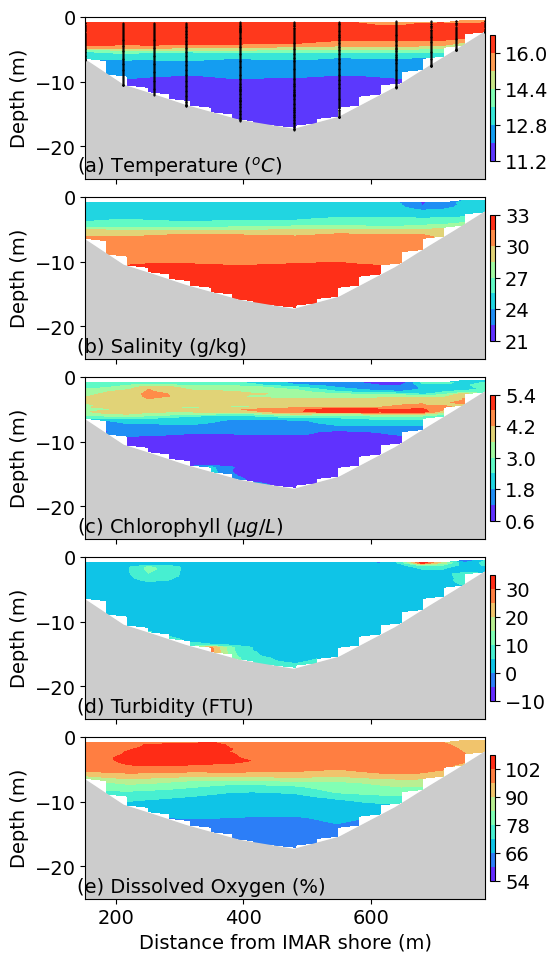

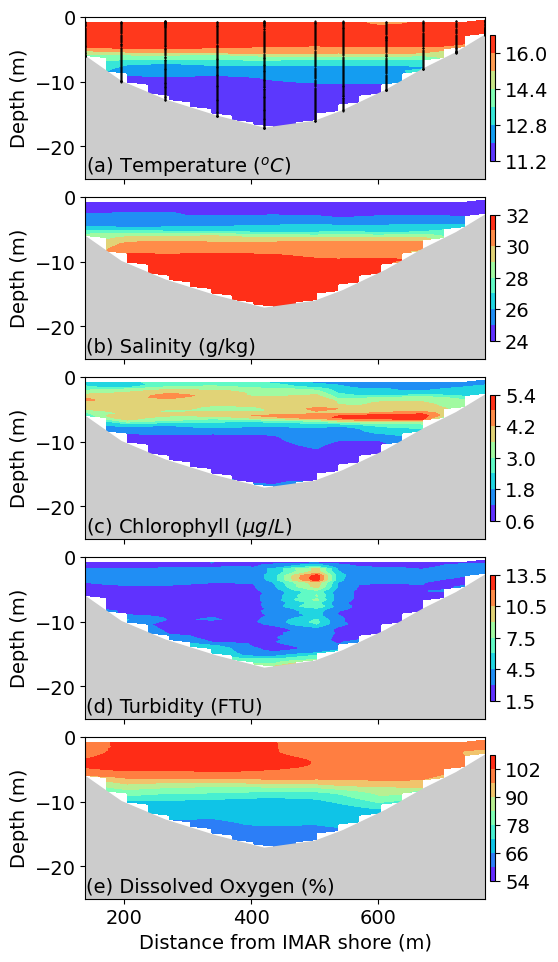

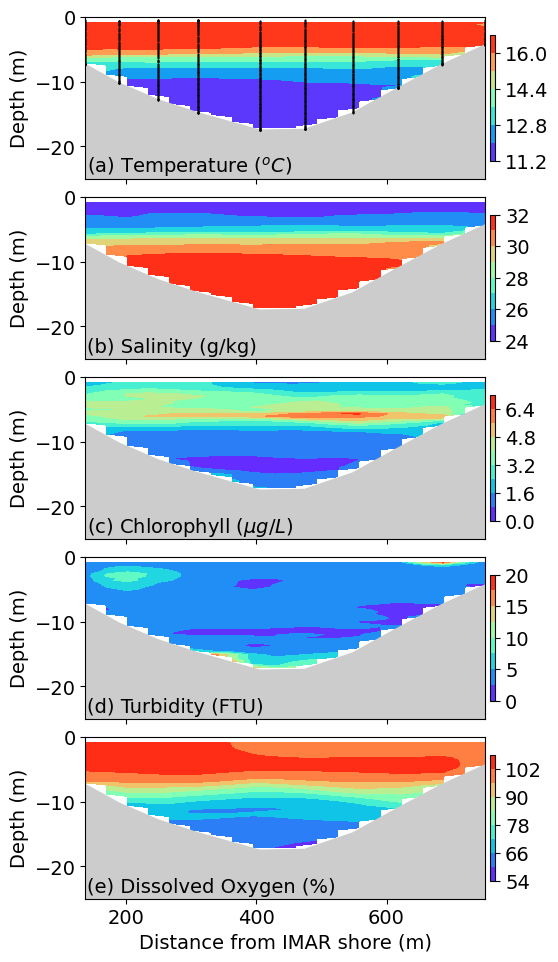

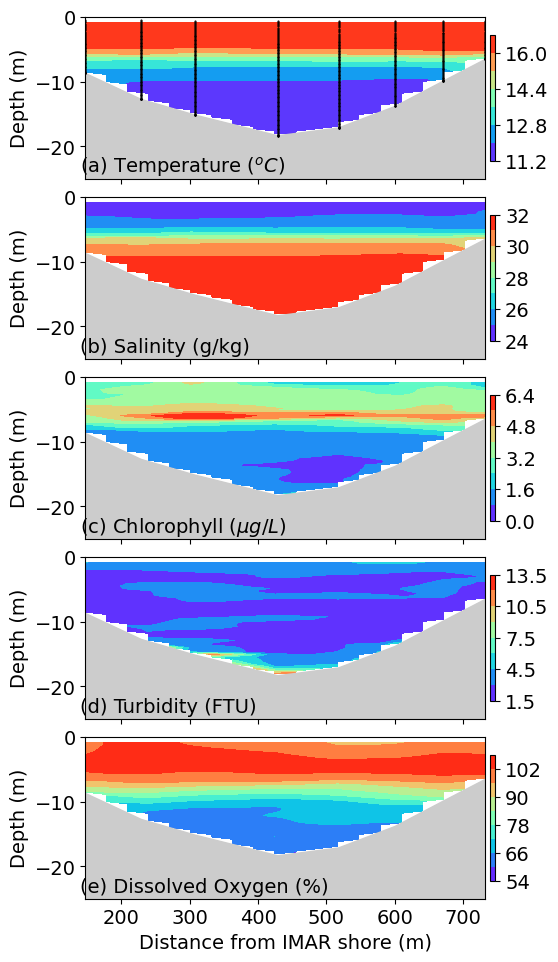

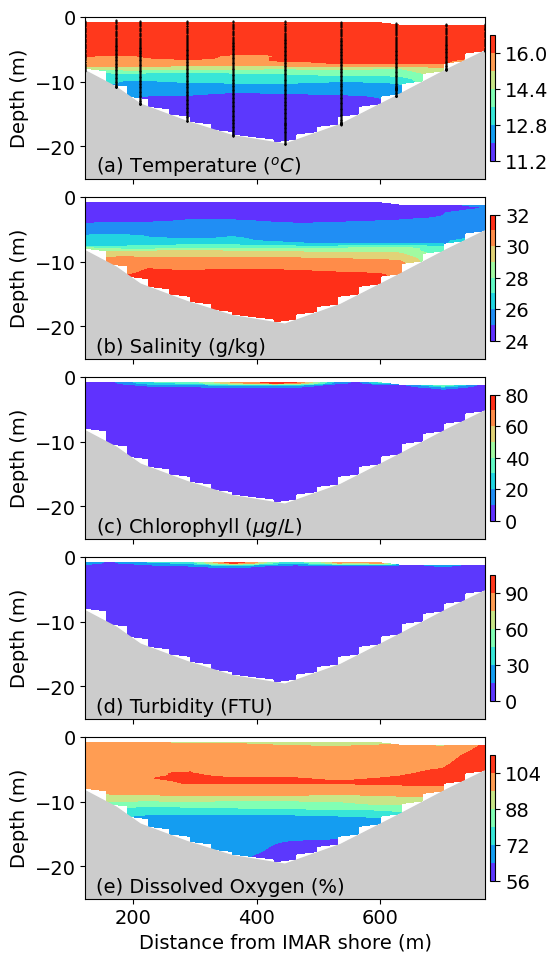

In [16]:
for n in range(5):
    tenglo_ctd(n)